In [1]:
import pandas as pd
import numpy as np

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Normalized Data

filepath = "./GEO Samples/train_data_Normalized.csv"
train_data = pd.read_csv(filepath)
X_train = train_data.drop(['Stage'], axis=1)
y_train = train_data[['Stage']]

filepath = "./GEO Samples/test_data_Normalized.csv"
test_data = pd.read_csv(filepath)
X_test = test_data.drop(['Stage'], axis=1)
y_test = test_data[['Stage']]

In [3]:
features_count = X_train.shape[1]
features_count

2550

## sklearn Model


---------------------------
MLP Classifier on Train Data
--------------------------
Accuracy: 0.9901960784313726
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      0.96      0.98        25
           4       0.96      1.00      0.98        25

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



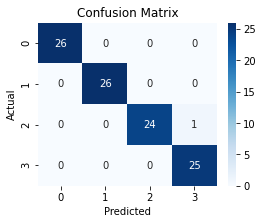

--------------------------
MLP Classifier
--------------------------
Accuracy: 0.38461538461538464
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       0.45      0.83      0.59         6
           3       0.33      0.14      0.20         7
           4       0.27      0.43      0.33         7

    accuracy                           0.38        26
   macro avg       0.52      0.39      0.35        26
weighted avg       0.50      0.38      0.35        26



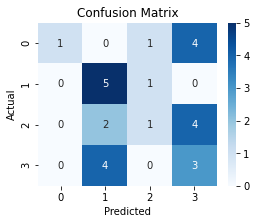

In [42]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(
    hidden_layer_sizes=(10,100,10,4),
    activation='relu',
    solver='adam',
    max_iter=500,
    learning_rate_init=0.005,
    random_state=19
)

MLP_model.fit(X_train, y_train["Stage"])

# ======================
# Predict on tain set
# ======================
y_pred = MLP_model.predict(X_train)

# Evaluate performance
cm = confusion_matrix(y_train, y_pred)

print("\n---------------------------")
print("MLP Classifier on Train Data\n--------------------------")
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Classification Report:\n", classification_report(y_train, y_pred))

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




# ======================
# Predict on test set
# ======================
y_pred = MLP_model.predict(X_test)

# Evaluate performance
cm = confusion_matrix(y_test, y_pred)

print("--------------------------\nMLP Classifier\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import torch
import torch.nn as nn
epochs = 1000

model = nn.Sequential(
    nn.Linear(764, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 10),
    nn.Sigmoid()
)

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(output, label)


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for n in range(epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(model)
